### 創建表 instl2 依各人的時間排序，讓表格比較好閱讀；不重要的還款設為準時還款
- 不重要的還款暫定還款金額小於預計還款金額的2%

### instl2_2 新增以下欄位
- 該筆貸款紀錄中的最大、最小還款期數 (原始資料可能有缺，最大還款期數待與previous_application內的資料驗證)
    (NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN)
- 該筆貸款最後還款日為何時 (DAYS_ENTRY_PAYMENT_MAX)
- 該筆貸款最早還款日為何時 (DAYS_ENTRY_PAYMENT_MIN)
- 每筆貸款最多延遲幾天 (DAYS_ENTRY_DIFF_MAX)
- 每筆貸款平均延遲幾天 (DAYS_ENTRY_DIFF_MEAN)
- 每筆貸款的每期還款金額中位數 (AMT_PAYMENT_MEDIAN)
- 每筆貸款的每期還款金額最大值 (AMT_PAYMENT_MAX)
- 延遲的期數 (DELAY_SUM)
- 延遲的期數占該筆貸款總期數多少比例 (DELAY%)

### instl2_3 (排除有na的列) 新增以下欄位
- 每筆貸款是否還完 (FINISHED)
- 每筆貸款還欠多少錢 (OUTSTANDING)
- 該筆貸款實際總還款金額 (AMT_PAYMENT_ALL)
- 該筆貸款預計總還款金額 (AMT_INSTALMENT_ALL)
- 第一期的延遲還款比例 (1_DELAY%)
- 第一期的最多延遲還款天數 (1_DAYS_ENTRY_DIFF_MAX)
- 前三期的延遲還款比例 (3_DELAY%)
- 前三期的最多延遲還款天數 (3_DAYS_ENTRY_DIFF_MAX)
- 前三期的平均延遲還款天數 (3_DAYS_ENTRY_DIFF_MEAN)
- 前六期的延遲還款比例 (6_DELAY%)
- 前六期的最多延遲還款天數 (6_DAYS_ENTRY_DIFF_MAX)
- 前六期的平均延遲還款天數 (6_DAYS_ENTRY_DIFF_MEAN)
- 前九期的延遲還款比例 (9_DELAY%)
- 前九期的最多延遲還款天數 (9_DAYS_ENTRY_DIFF_MAX)
- 前九期的平均延遲還款天數 (9_DAYS_ENTRY_DIFF_MEAN)
- 還有以上的最後一期、最後三期、最後六期、最後九期

### 合併到previous application

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
instl = pd.read_csv("..\\..\\datasets\\homecdt_eda\\installments_payments.csv")

In [3]:
instl.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [4]:
instl.shape[0]

13605401

In [5]:
instl.isna().sum()/len(instl) # 兩欄有空值

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

In [6]:
instl['DAYS_ENTRY_PAYMENT'].dtype

dtype('float64')

In [7]:
instl['DAYS_ENTRY_PAYMENT'].unique()

array([-1187., -2156.,   -63., ..., -3023., -3061., -3096.])

In [8]:
instl.isna().sum() # 2905列為空值

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

DAYS_ENTRY_PAYMENT與AMT_PAYMENT同時會為na

In [9]:
pd.set_option('display.max_rows',None) # 稍微排序後檢視資料
instl.sort_values(by=['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER']).head(200)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775


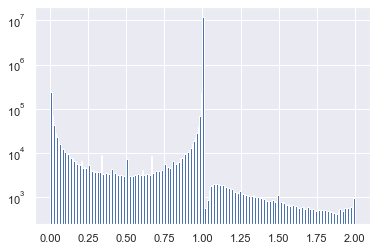

In [10]:
(instl['AMT_PAYMENT']/instl['AMT_INSTALMENT']).hist(bins=200,log=True,range=[0,2]) # 有一些狀況的實際還款金額會超過預計還款金額

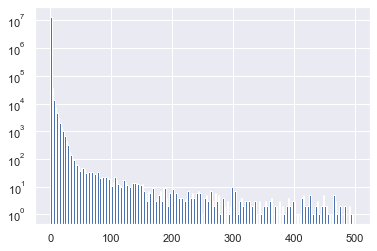

In [11]:
(instl['AMT_PAYMENT']/instl['AMT_INSTALMENT']).hist(bins=200,log=True,range=[0,500]) # 有一些狀況的實際還款金額會超過預計還款金額

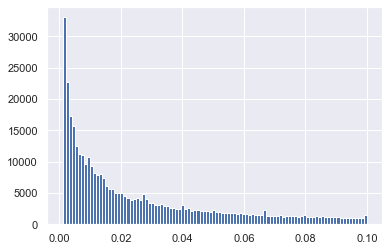

In [12]:
(instl['AMT_PAYMENT']/instl['AMT_INSTALMENT']).hist(bins=100,range=[0.001,0.1]) 

#### 假設實際還款金額占預計還款金額 2%以下的為行政費用之類的非無意延遲還款，也就是早交遲交都不重要，可被排除

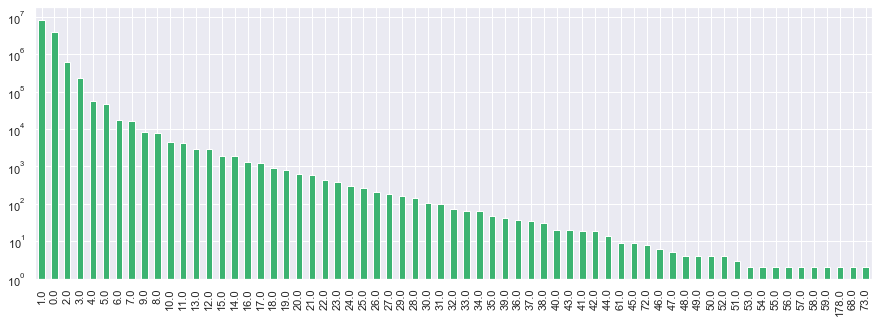

In [13]:
plt.figure(figsize=(15,5))
instl['NUM_INSTALMENT_VERSION'].value_counts().plot(kind='bar',color='#3CB371',log=True) # NUM_INSTALMENT_VERSION的分布狀況

### 創建表 instl2 依各人的時間排序，讓表格比較好閱讀；不重要的還款設為準時還款
- 不重要的還款暫定還款金額小於預計還款金額的2%
- 此表為新增欄為前的準備

In [14]:
pd.set_option('display.max_rows',None) # 依各人的時間排序，讓表格比較好閱讀
instl2 = instl.sort_values(by=['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT'])
instl2.head(500)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775


In [15]:
instl2['DAYS_ENTRY_DIFF'] = instl2['DAYS_ENTRY_PAYMENT']-instl2['DAYS_INSTALMENT'] # 新增延遲還款天數欄位，正為遲還，負為早還
instl2['AMT_PAY_DIFF'] = instl2['AMT_PAYMENT']-instl2['AMT_INSTALMENT'] # 新增還款金額不足欄位，正為多還，負為少還
instl2['DELAY'] = (instl2['DAYS_ENTRY_DIFF']>0).replace(True,1) # 新增是否延遲還款欄位，1為有延遲，0為沒延遲
instl2.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000,-6.0,0.0,0.0
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000,-36.0,0.0,0.0
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000,-11.0,0.0,0.0
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900,-9.0,0.0,0.0
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050,0.0,0.0,0.0
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050,11.0,0.0,1.0
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925,0.0,0.0,0.0
2144879,1038818,100002,1.0,1,-565.0,-587.0,9251.775,9251.775,-22.0,0.0,0.0
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775,-27.0,0.0,0.0
1675768,1038818,100002,1.0,3,-505.0,-529.0,9251.775,9251.775,-24.0,0.0,0.0


### instl2_1 整理為每期繳款狀況
### instl2_2 新增以下欄位
- 該筆貸款紀錄中的最大、最小還款期數 (原始資料可能有缺，最大還款期數待與previous_application內的資料驗證)
    (NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN)
- 該筆貸款最後還款日為何時 (DAYS_ENTRY_PAYMENT_MAX)
- 該筆貸款最早還款日為何時 (DAYS_ENTRY_PAYMENT_MIN)
- 每筆貸款最多延遲幾天 (DAYS_ENTRY_DIFF_MAX)
- 每筆貸款平均延遲幾天 (DAYS_ENTRY_DIFF_MEAN)
- 每筆貸款的每期還款金額中位數 (AMT_PAYMENT_MEDIAN)
- 每筆貸款的每期還款金額最大值 (AMT_PAYMENT_MAX)
- 延遲的期數 (DELAY_SUM)
- 延遲的期數占該筆貸款總期數多少比例 (DELAY%)

In [16]:
instl2['A_P/I'] = instl2['AMT_PAYMENT']/instl2['AMT_INSTALMENT']

In [17]:
pd.reset_option('all')
instl2[instl2['A_P/I']<0.02] # 假設這些都是不重要的還款


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\ProgramData\Anaconda3\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
2328091,1940724,100007,1.0,1,-1076.0,-1106.0,22678.785,23.130,-30.0,-22655.655,0.0,0.001020
2656012,2462742,100007,1.0,10,-1466.0,-1497.0,3601.530,3.240,-31.0,-3598.290,0.0,0.000900
1757327,2462742,100007,1.0,12,-1406.0,-1436.0,3577.050,0.180,-30.0,-3576.870,0.0,0.000050
2358618,1907290,100008,1.0,10,-2029.0,-712.0,11986.155,227.160,1317.0,-11758.995,1.0,0.018952
1647439,2794143,100011,1.0,24,-469.0,-498.0,31295.250,461.565,-29.0,-30833.685,0.0,0.014749
...,...,...,...,...,...,...,...,...,...,...,...,...
12775776,2073384,456255,1.0,1,-618.0,-648.0,16400.610,34.965,-30.0,-16365.645,0.0,0.002132
13146798,2073384,456255,1.0,2,-588.0,-613.0,16400.610,81.495,-25.0,-16319.115,0.0,0.004969
13266002,2631384,456255,3.0,18,-246.0,-266.0,27489.690,110.880,-20.0,-27378.810,0.0,0.004034
12734779,2631384,456255,3.0,20,-186.0,-221.0,27489.690,447.255,-35.0,-27042.435,0.0,0.016270


In [18]:
instl2.loc[instl2['A_P/I']<0.02,'DAYS_ENTRY_DIFF'] = 0 # 不重要的還款設為準時還款

In [19]:
instl2[instl2['A_P/I']<0.02] 

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
2328091,1940724,100007,1.0,1,-1076.0,-1106.0,22678.785,23.130,0.0,-22655.655,0.0,0.001020
2656012,2462742,100007,1.0,10,-1466.0,-1497.0,3601.530,3.240,0.0,-3598.290,0.0,0.000900
1757327,2462742,100007,1.0,12,-1406.0,-1436.0,3577.050,0.180,0.0,-3576.870,0.0,0.000050
2358618,1907290,100008,1.0,10,-2029.0,-712.0,11986.155,227.160,0.0,-11758.995,1.0,0.018952
1647439,2794143,100011,1.0,24,-469.0,-498.0,31295.250,461.565,0.0,-30833.685,0.0,0.014749
...,...,...,...,...,...,...,...,...,...,...,...,...
12775776,2073384,456255,1.0,1,-618.0,-648.0,16400.610,34.965,0.0,-16365.645,0.0,0.002132
13146798,2073384,456255,1.0,2,-588.0,-613.0,16400.610,81.495,0.0,-16319.115,0.0,0.004969
13266002,2631384,456255,3.0,18,-246.0,-266.0,27489.690,110.880,0.0,-27378.810,0.0,0.004034
12734779,2631384,456255,3.0,20,-186.0,-221.0,27489.690,447.255,0.0,-27042.435,0.0,0.016270


In [20]:
instl2_1 = pd.DataFrame(instl2.groupby(['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER']).agg({'DAYS_ENTRY_PAYMENT':['max','min'],
                                                                                                 'DAYS_ENTRY_DIFF':'max',
                                                                                                 'AMT_PAYMENT':['median','max'],
                                                                                                 'DELAY':'max'}))
pd.set_option('display.max_rows',None)
instl2_1.head(200) # 依每筆貸款，整理出每期還款的最大延遲天數作為該期代表與是否延遲

DAYS_ENTRY_PAYMENT          \
                                                           max     min   
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                              
100001     1369693    1                                -1715.0 -1715.0   
                      2                                -1715.0 -1715.0   
                      3                                -1660.0 -1660.0   
                      4                                -1628.0 -1628.0   
           1851984    2                                -2916.0 -2916.0   
                      3                                -2875.0 -2875.0   
                      4                                -2856.0 -2856.0   
100002     1038818    1                                 -587.0  -587.0   
                      2                                 -562.0  -562.0   
                      3                                 -529.0  -529.0   
                      4                                 -498.0  -498.0   
                      5                                 -468.0  -468.0   
                      6                                 -446.0  -446.0   
                      7                                 -412.0  -412.0   
                      8                                 -375.0  -375.0   
                      9                                 -344.0  -344.0   
                      10                                -312.0  -312.0   
                      11                                -284.0  -284.0   
                      12                                -250.0  -250.0   
                      13                                -224.0  -224.0   
                      14                                -194.0  -194.0   
                      15                                -160.0  -160.0   
                      16                                -133.0  -133.0   
                      17                                 -99.0   -99.0   
                      18                                 -67.0   -67.0   
                      19                                 -49.0   -49.0   
100003     1810518    1                                 -719.0  -719.0   
                      2                                 -690.0  -690.0   
                      3                                 -661.0  -661.0   
                      4                                 -629.0  -629.0   
                      5                                 -600.0  -600.0   
                      6                                 -570.0  -570.0   
                      7                                 -544.0  -544.0   
           2396755    1                                -2324.0 -2324.0   
                      2                                -2290.0 -2290.0   
                      3                                -2260.0 -2260.0   
                      4                                -2226.0 -2226.0   
                      5                                -2199.0 -2199.0   
                      6                                -2168.0 -2168.0   
                      7                                -2136.0 -2136.0   
                      8                                -2105.0 -2105.0   
                      9                                -2071.0 -2071.0   
                      10                               -2044.0 -2044.0   
                      11                               -2013.0 -2013.0   
                      12                               -1985.0 -1985.0   
           2636178    1                                 -806.0  -806.0   
                      2                                 -777.0  -777.0   
                      3                                 -746.0  -746.0   
                      4                                 -719.0  -719.0   
                      5                                 -690.0  -690.0   
                      6                                 -661.0  -661.0   
100004     1564014    1                         

In [21]:
instl2_1.columns = ['DAYS_ENTRY_PAYMENT_MAX','DAYS_ENTRY_PAYMENT_MIN','DAYS_ENTRY_DIFF','AMT_PAYMENT_MEDIAN','AMT_PAYMENT_MAX','DELAY']

In [22]:
instl2_1.head()

DAYS_ENTRY_PAYMENT_MAX  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                           
100001     1369693    1                                     -1715.0   
                      2                                     -1715.0   
                      3                                     -1660.0   
                      4                                     -1628.0   
           1851984    2                                     -2916.0   

                                             DAYS_ENTRY_PAYMENT_MIN  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                           
100001     1369693    1                                     -1715.0   
                      2                                     -1715.0   
                      3                                     -1660.0   
                      4                                     -1628.0   
           1851984    2                                     -2916.0   

                                             DAYS_ENTRY_DIFF  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                    
100001     1369693    1                                 -6.0   
                      2                                -36.0   
                      3                                -11.0   
                      4                                 -9.0   
           1851984    2                                  0.0   

                                             AMT_PAYMENT_MEDIAN  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                       
100001     1369693    1                                 3951.00   
                      2                                 3951.00   
                      3                                 3951.00   
                      4                                17397.90   
           1851984    2                                 3982.05   

                                             AMT_PAYMENT_MAX  DELAY  
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                          
100001     1369693    1                              3951.00    0.0  
                      2                              3951.00    0.0  
                      3                              3951.00    0.0  
                      4                             17397.90    0.0  
           1851984    2                              3982.05    0.0

In [23]:
pd.reset_option('all')
instl2_1[instl2_1['DELAY']>1] # 檢查是否有同一期分多次還款但都延遲還款的狀況，結果沒有


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,,,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY
SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_NUMBER,,,,,,


In [24]:
instl2_1.columns

Index(['DAYS_ENTRY_PAYMENT_MAX', 'DAYS_ENTRY_PAYMENT_MIN', 'DAYS_ENTRY_DIFF',
       'AMT_PAYMENT_MEDIAN', 'AMT_PAYMENT_MAX', 'DELAY'],
      dtype='object')

In [25]:
instl2_1.index

MultiIndex([(100001, 1369693,  1),
            (100001, 1369693,  2),
            (100001, 1369693,  3),
            (100001, 1369693,  4),
            (100001, 1851984,  2),
            (100001, 1851984,  3),
            (100001, 1851984,  4),
            (100002, 1038818,  1),
            (100002, 1038818,  2),
            (100002, 1038818,  3),
            ...
            (456255, 2631384, 18),
            (456255, 2631384, 19),
            (456255, 2631384, 20),
            (456255, 2631384, 21),
            (456255, 2631384, 22),
            (456255, 2631384, 23),
            (456255, 2631384, 24),
            (456255, 2729207,  1),
            (456255, 2729207,  2),
            (456255, 2729207,  3)],
           names=['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], length=12861994)

In [26]:
instl2_1.reset_index(level='NUM_INSTALMENT_NUMBER',inplace=True) # 將其中一欄index改成表格資料

In [27]:
instl2_1.rename(columns={'NUM_INSTALMENT_NUMBER':'NUM_INSTALMENT_NUMBER_GROUP'},inplace=True)

In [28]:
instl2_1.columns

Index(['NUM_INSTALMENT_NUMBER_GROUP', 'DAYS_ENTRY_PAYMENT_MAX',
       'DAYS_ENTRY_PAYMENT_MIN', 'DAYS_ENTRY_DIFF', 'AMT_PAYMENT_MEDIAN',
       'AMT_PAYMENT_MAX', 'DELAY'],
      dtype='object')

In [29]:
instl2_2 = pd.DataFrame(instl2_1.groupby(['SK_ID_CURR','SK_ID_PREV']).agg({'NUM_INSTALMENT_NUMBER_GROUP':['max','min'],
                                                                           'DAYS_ENTRY_PAYMENT_MAX':'max',
                                                                           'DAYS_ENTRY_PAYMENT_MIN':'min',
                                                                           'DAYS_ENTRY_DIFF':['max','mean'],
                                                                           'AMT_PAYMENT_MEDIAN':'median',
                                                                           'AMT_PAYMENT_MAX':'max',
                                                                           'DELAY':'sum'}))
# 整理出每筆貸款分成幾次還與延遲次數

In [30]:
instl2_2.columns

MultiIndex([('NUM_INSTALMENT_NUMBER_GROUP',    'max'),
            ('NUM_INSTALMENT_NUMBER_GROUP',    'min'),
            (     'DAYS_ENTRY_PAYMENT_MAX',    'max'),
            (     'DAYS_ENTRY_PAYMENT_MIN',    'min'),
            (            'DAYS_ENTRY_DIFF',    'max'),
            (            'DAYS_ENTRY_DIFF',   'mean'),
            (         'AMT_PAYMENT_MEDIAN', 'median'),
            (            'AMT_PAYMENT_MAX',    'max'),
            (                      'DELAY',    'sum')],
           )

In [31]:
instl2_2.columns = ['NUM_INSTALMENT_NUMBER_GROUP_MAX',
                    'NUM_INSTALMENT_NUMBER_GROUP_MIN',
                    'DAYS_ENTRY_PAYMENT_MAX',
                    'DAYS_ENTRY_PAYMENT_MIN',
                    'DAYS_ENTRY_DIFF_MAX',
                    'DAYS_ENTRY_DIFF_MEAN',
                    'AMT_PAYMENT_MEDIAN',
                    'AMT_PAYMENT_MAX',
                    'DELAY_SUM']

In [32]:
instl2_2.reset_index(level=('SK_ID_CURR','SK_ID_PREV'),inplace=True)

In [33]:
instl2_2['DELAY%'] = instl2_2['DELAY_SUM']/(instl2_2['NUM_INSTALMENT_NUMBER_GROUP_MAX']-instl2_2['NUM_INSTALMENT_NUMBER_GROUP_MIN']+1)

In [34]:
instl2_2

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%
0,100001,1369693,4,1,-1628.0,-1715.0,-6.0,-15.500000,3951.000,17397.900,0.0,0.000000
1,100001,1851984,4,2,-2856.0,-2916.0,11.0,3.666667,3982.050,3982.050,1.0,0.333333
2,100002,1038818,19,1,-49.0,-587.0,-12.0,-20.421053,9251.775,53093.745,0.0,0.000000
3,100003,1810518,7,1,-544.0,-719.0,-3.0,-4.428571,98356.995,560835.360,0.0,0.000000
4,100003,2396755,12,1,-1985.0,-2324.0,-1.0,-6.750000,6737.310,6737.310,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
997747,456255,1359084,8,1,-237.0,-435.0,7.0,-5.000000,11314.170,49984.380,2.0,0.250000
997748,456255,1743609,10,1,-692.0,-972.0,5.0,-6.400000,11090.835,32364.765,1.0,0.100000
997749,456255,2073384,3,1,-573.0,-648.0,5.0,-2.666667,8200.305,249830.685,2.0,0.666667
997750,456255,2631384,24,1,-76.0,-768.0,4.0,-6.625000,27489.690,669251.655,4.0,0.166667


In [35]:
instl2_1.loc[(456255,1359084)] # 對照檢查用(instl2_2的倒數第五筆)

NUM_INSTALMENT_NUMBER_GROUP  DAYS_ENTRY_PAYMENT_MAX  \
SK_ID_CURR SK_ID_PREV                                                        
456255     1359084                               1                  -435.0   
           1359084                               2                  -404.0   
           1359084                               3                  -366.0   
           1359084                               4                  -339.0   
           1359084                               5                  -308.0   
           1359084                               6                  -268.0   
           1359084                               7                  -243.0   
           1359084                               8                  -237.0   

                       DAYS_ENTRY_PAYMENT_MIN  DAYS_ENTRY_DIFF  \
SK_ID_CURR SK_ID_PREV                                            
456255     1359084                     -435.0            -10.0   
           1359084                     -404.0             -9.0   
           1359084                     -366.0             -1.0   
           1359084                     -339.0             -4.0   
           1359084                     -308.0             -3.0   
           1359084                     -273.0              7.0   
           1359084                     -243.0              2.0   
           1359084                     -237.0            -22.0   

                       AMT_PAYMENT_MEDIAN  AMT_PAYMENT_MAX  DELAY  
SK_ID_CURR SK_ID_PREV                                              
456255     1359084              11314.170         11314.17    0.0  
           1359084              11314.170         11314.17    0.0  
           1359084              11314.170         11314.17    0.0  
           1359084              11314.170         11314.17    0.0  
           1359084              11314.170         11314.17    0.0  
           1359084               5657.085          9248.22    1.0  
           1359084              11314.170         11314.17    1.0  
           1359084              49984.380         49984.38    0.0

In [36]:
instl2[instl['SK_ID_PREV']==1359084]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
13013055,1359084,456255,1.0,1,-425.0,-435.0,11314.17,11314.17,-10.0,0.00,0.0,1.000000
12599774,1359084,456255,1.0,2,-395.0,-404.0,11314.17,11314.17,-9.0,0.00,0.0,1.000000
13005007,1359084,456255,1.0,3,-365.0,-366.0,11314.17,11314.17,-1.0,0.00,0.0,1.000000
11960151,1359084,456255,1.0,4,-335.0,-339.0,11314.17,11314.17,-4.0,0.00,0.0,1.000000
12954816,1359084,456255,1.0,5,-305.0,-308.0,11314.17,11314.17,-3.0,0.00,0.0,1.000000
11988256,1359084,456255,1.0,6,-275.0,-273.0,11314.17,9248.22,2.0,-2065.95,1.0,0.817402
12985950,1359084,456255,1.0,6,-275.0,-268.0,11314.17,2065.95,7.0,-9248.22,1.0,0.182598
13561589,1359084,456255,1.0,7,-245.0,-243.0,11314.17,11314.17,2.0,0.00,1.0,1.000000
11660647,1359084,456255,2.0,8,-215.0,-237.0,49984.38,49984.38,-22.0,0.00,0.0,1.000000


### 發現另一種記帳型態：
同一期貸款分成兩個version，應還金額也拆成兩筆，實際還款金額則兩期都寫合計還款金額

In [37]:
instl2[instl2['SK_ID_PREV']==2631384] # 這筆的實際還款金額與預計還款金額有落差，來自第一筆有兩個version

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
11721915,2631384,456255,2.0,1,-756.0,-768.0,615229.515,669251.655,-12.0,54022.140,0.0,1.087808
11721916,2631384,456255,1.0,1,-756.0,-768.0,54022.140,669251.655,-12.0,615229.515,0.0,12.388470
11868424,2631384,456255,3.0,2,-726.0,-734.0,27489.690,27489.690,-8.0,0.000,0.0,1.000000
11567206,2631384,456255,3.0,3,-696.0,-705.0,27489.690,27489.690,-9.0,0.000,0.0,1.000000
11551234,2631384,456255,3.0,4,-666.0,-692.0,27489.690,27489.690,-26.0,0.000,0.0,1.000000
12918762,2631384,456255,3.0,5,-636.0,-648.0,27489.690,27489.690,-12.0,0.000,0.0,1.000000
13552331,2631384,456255,3.0,6,-606.0,-613.0,27489.690,27489.690,-7.0,0.000,0.0,1.000000
11871356,2631384,456255,3.0,7,-576.0,-586.0,27489.690,27489.690,-10.0,0.000,0.0,1.000000
12753898,2631384,456255,3.0,8,-546.0,-556.0,27489.690,27489.690,-10.0,0.000,0.0,1.000000
13599889,2631384,456255,3.0,9,-516.0,-523.0,27489.690,27489.690,-7.0,0.000,0.0,1.000000


### instl2_3 (排除有na的列) 新增以下欄位
- 每筆貸款是否還完 (FINISHED)
- 每筆貸款還欠多少錢 (OUTSTANDING)
- 該筆貸款實際總還款金額 (AMT_PAYMENT_ALL)
- 該筆貸款預計總還款金額 (AMT_PAYMENT_ALL)
- 第一期的延遲還款比例 (1_DELAY%)
- 第一期的最多延遲還款天數 (1_DAYS_ENTRY_DIFF_MAX)
- 第三期的延遲還款比例 (3_DELAY%)
- 第三期的最多延遲還款天數 (3_DAYS_ENTRY_DIFF_MAX)
- 第三期的平均延遲還款天數 (3_DAYS_ENTRY_DIFF_MEAN)
- 第六期的延遲還款比例 (6_DELAY%)
- 第六期的最多延遲還款天數 (6_DAYS_ENTRY_DIFF_MAX)
- 第六期的平均延遲還款天數 (6_DAYS_ENTRY_DIFF_MEAN)
- 第九期的延遲還款比例 (9_DELAY%)
- 第九期的最多延遲還款天數 (9_DAYS_ENTRY_DIFF_MAX)
- 第九期的平均延遲還款天數 (9_DAYS_ENTRY_DIFF_MEAN)

In [38]:
instl2.shape[0]

13605401

In [39]:
instl2_3 = instl2.dropna(axis=0,inplace=False).copy() # 先排除有NA的列
instl2_3.shape[0]

13602494

In [40]:
13605401-13602496 # 扣掉2905列

2905

In [41]:
# 先把一期貸款分多次償還的狀況整理好
# 各期與各版本的繳款狀況均看最晚的，做為評估違約的可能性
instl2_3 = pd.DataFrame(instl2_3.groupby(['SK_ID_CURR',
                                        'SK_ID_PREV',
                                        'NUM_INSTALMENT_NUMBER',
                                        'NUM_INSTALMENT_VERSION']).agg({'DAYS_INSTALMENT':'max',
                                                                        'DAYS_ENTRY_PAYMENT':'max',
                                                                        'AMT_INSTALMENT':'mean',
                                                                       'AMT_PAYMENT':'sum'}))
pd.set_option('display.max_rows',None)
instl2_3.head(100)

DAYS_INSTALMENT  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER NUM_INSTALMENT_VERSION                    
100001     1369693    1                     1.0                             -1709.0   
                      2                     1.0                             -1679.0   
                      3                     1.0                             -1649.0   
                      4                     2.0                             -1619.0   
           1851984    2                     1.0                             -2916.0   
                      3                     1.0                             -2886.0   
                      4                     1.0                             -2856.0   
100002     1038818    1                     1.0                              -565.0   
                      2                     1.0                              -535.0   
                      3                     1.0                              -505.0   
                      4                     1.0                              -475.0   
                      5                     1.0                              -445.0   
                      6                     1.0                              -415.0   
                      7                     1.0                              -385.0   
                      8                     1.0                              -355.0   
                      9                     1.0                              -325.0   
                      10                    1.0                              -295.0   
                      11                    1.0                              -265.0   
                      12                    1.0                              -235.0   
                      13                    1.0                              -205.0   
                      14                    1.0                              -175.0   
                      15                    1.0                              -145.0   
                      16                    1.0                              -115.0   
                      17                    1.0                               -85.0   
                      18                    1.0                               -55.0   
                      19                    2.0                               -25.0   
100003     1810518    1                     1.0                              -716.0   
                      2                     1.0                              -686.0   
                      3                     1.0                              -656.0   
                      4                     1.0                              -626.0   
                      5                     1.0                              -596.0   
                      6                     1.0                              -566.0   
                      7                     2.0                              -536.0   
           2396755    1                     1.0                             -2310.0   
                      2                     1.0                             -2280.0   
                      3                     1.0                             -2250.0   
                      4                     1.0                             -2220.0   
                      5                     1.0                             -2190.0   
                      6                     1.0                             -2160.0   
                      7                     1.0                             -2130.0   
                      8                     1.0                             -2100.0   
                      9                     1.0                             -2070.0   
                      10                    1.0                             -2040.0   
                      11                    1.0                             -2010.0   
                      12                    1.0                   

In [42]:
instl2_3.loc[(456255,2631384)] # 這筆的實際還款金額與預計還款金額有落差，來自第一筆有兩個version

DAYS_INSTALMENT  \
NUM_INSTALMENT_NUMBER NUM_INSTALMENT_VERSION                    
1                     1.0                              -756.0   
                      2.0                              -756.0   
2                     3.0                              -726.0   
3                     3.0                              -696.0   
4                     3.0                              -666.0   
5                     3.0                              -636.0   
6                     3.0                              -606.0   
7                     3.0                              -576.0   
8                     3.0                              -546.0   
9                     3.0                              -516.0   
10                    3.0                              -486.0   
11                    3.0                              -456.0   
12                    3.0                              -426.0   
13                    3.0                              -396.0   
14                    3.0                              -366.0   
15                    3.0                              -336.0   
16                    3.0                              -306.0   
17                    3.0                              -276.0   
18                    3.0                              -246.0   
19                    3.0                              -216.0   
20                    3.0                              -186.0   
21                    3.0                              -156.0   
22                    3.0                              -126.0   
23                    3.0                               -96.0   
24                    4.0                               -66.0   

                                              DAYS_ENTRY_PAYMENT  \
NUM_INSTALMENT_NUMBER NUM_INSTALMENT_VERSION                       
1                     1.0                                 -768.0   
                      2.0                                 -768.0   
2                     3.0                                 -734.0   
3                     3.0                                 -705.0   
4                     3.0                                 -692.0   
5                     3.0                                 -648.0   
6                     3.0                                 -613.0   
7                     3.0                                 -586.0   
8                     3.0                                 -556.0   
9                     3.0                                 -523.0   
10                    3.0                                 -489.0   
11                    3.0                                 -465.0   
12                    3.0                                 -435.0   
13                    3.0                                 -404.0   
14                    3.0                                 -366.0   
15                    3.0                                 -339.0   
16                    3.0                                 -308.0   
17                    3.0                                 -273.0   
18                    3.0                                 -243.0   
19                    3.0                                 -237.0   
20                    3.0                                 -182.0   
21                    3.0                                 -160.0   
22                    3.0                                 -123.0   
23                    3.0                                  -98.0   
24                    4.0                                  -76.0   

                                              AMT_INSTALMENT  AMT_PAYMENT  
NUM_INSTALMENT_NUMBER NUM_INSTALMENT_VERSION                               
1                     1.0                          54022.140   669251.655  
                      2.0                         615229.515   669251.655  
2                     3.0                          27489.690    27489.690  
3                     3.0                          27489.690    27489.690

In [43]:
instl2_3.reset_index(level=('SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER','NUM_INSTALMENT_VERSION'),inplace=True)

In [44]:
# 把另一種記帳型態整理好
instl2_3 = pd.DataFrame(instl2_3.groupby(['SK_ID_CURR',
                                        'SK_ID_PREV',
                                        'NUM_INSTALMENT_NUMBER']).agg({'DAYS_INSTALMENT':'max',
                                                                       'DAYS_ENTRY_PAYMENT':'max',
                                                                       'AMT_INSTALMENT':'sum',
                                                                       'AMT_PAYMENT':'mean'}))
instl2_3.head(20)

DAYS_INSTALMENT  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                    
100001     1369693    1                              -1709.0   
                      2                              -1679.0   
                      3                              -1649.0   
                      4                              -1619.0   
           1851984    2                              -2916.0   
                      3                              -2886.0   
                      4                              -2856.0   
100002     1038818    1                               -565.0   
                      2                               -535.0   
                      3                               -505.0   
                      4                               -475.0   
                      5                               -445.0   
                      6                               -415.0   
                      7                               -385.0   
                      8                               -355.0   
                      9                               -325.0   
                      10                              -295.0   
                      11                              -265.0   
                      12                              -235.0   
                      13                              -205.0   

                                             DAYS_ENTRY_PAYMENT  \
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                       
100001     1369693    1                                 -1715.0   
                      2                                 -1715.0   
                      3                                 -1660.0   
                      4                                 -1628.0   
           1851984    2                                 -2916.0   
                      3                                 -2875.0   
                      4                                 -2856.0   
100002     1038818    1                                  -587.0   
                      2                                  -562.0   
                      3                                  -529.0   
                      4                                  -498.0   
                      5                                  -468.0   
                      6                                  -446.0   
                      7                                  -412.0   
                      8                                  -375.0   
                      9                                  -344.0   
                      10                                 -312.0   
                      11                                 -284.0   
                      12                                 -250.0   
                      13                                 -224.0   

                                             AMT_INSTALMENT  AMT_PAYMENT  
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                               
100001     1369693    1                            3951.000     3951.000  
                      2                            3951.000     3951.000  
                      3                            3951.000     3951.000  
                      4                           17397.900    17397.900  
           1851984    2                            3982.050     3982.050  
                      3                            3982.050     3982.050  
                      4                            3980.925     3980.925  
100002     1038818    1                            9251.775     9251.775  
                      2                            9251.775     9251.775  
                      3                            9251.775     9251.775  
                      4                            9251.775     9251.775  
                      5                            9251.775     9251.775  
                      6                            9251.775     9251.775  
                      7             

In [45]:
instl2_3.loc[(456255,2631384)].head() # 檢查是否已整理完成

,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
NUM_INSTALMENT_NUMBER,,,,
1,-756.0,-768.0,669251.655,669251.655
2,-726.0,-734.0,27489.690,27489.690
3,-696.0,-705.0,27489.690,27489.690
4,-666.0,-692.0,27489.690,27489.690
5,-636.0,-648.0,27489.690,27489.690


In [46]:
instl2_3.reset_index(level=('SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER'),inplace=True)

In [47]:
instl2_3['1_DELAY'] = (instl2_3['NUM_INSTALMENT_NUMBER']==1 & 
                        (instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT'])).replace(True,1)
instl2_3['1_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']==1).replace(True,1) # 判斷此列是否為第1列
instl2_3['1_gauge'].replace(0,np.nan,inplace=True)
instl2_3['1_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] # 遲繳天數
instl2_3['1_DAYS_ENTRY_DIFF'] = instl2_3['1_DAYS_ENTRY_DIFF']*instl2_3['1_gauge'] # 將非第一列的遲繳天數改na

instl2_3['3_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']<=3 # 條件判斷欄，是否為前三期
instl2_3['3_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']  # 條件判斷欄，是否遲繳
instl2_3['3_DELAY'] = (instl2_3['3_DELAY_tmp1'] & instl2_3['3_DELAY_tmp2']).replace(True,1) # 綜合前兩個條件
instl2_3['3_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']<=3).replace(True,1) # 判斷此列是否為前三期
instl2_3['3_gauge'].replace(0,np.nan,inplace=True)
instl2_3['3_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] # 遲繳天數
instl2_3['3_DAYS_ENTRY_DIFF'] = instl2_3['3_DAYS_ENTRY_DIFF']*instl2_3['3_gauge'] # 將非前三列的遲繳天數改na

instl2_3['6_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']<=6 # 新增前六期的狀況欄位，方法同上
instl2_3['6_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']
instl2_3['6_DELAY'] = (instl2_3['6_DELAY_tmp1'] & instl2_3['6_DELAY_tmp2']).replace(True,1)
instl2_3['6_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']<=6).replace(True,1)
instl2_3['6_gauge'].replace(0,np.nan,inplace=True)
instl2_3['6_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] 
instl2_3['6_DAYS_ENTRY_DIFF'] = instl2_3['6_DAYS_ENTRY_DIFF']*instl2_3['6_gauge'] 

instl2_3['9_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']<=9 # 新增前九期的狀況欄位，方法同上
instl2_3['9_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']
instl2_3['9_DELAY'] = (instl2_3['9_DELAY_tmp1'] & instl2_3['9_DELAY_tmp2']).replace(True,1)
instl2_3['9_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']<=9).replace(True,1)
instl2_3['9_gauge'].replace(0,np.nan,inplace=True)
instl2_3['9_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT']
instl2_3['9_DAYS_ENTRY_DIFF'] = instl2_3['9_DAYS_ENTRY_DIFF']*instl2_3['9_gauge']

instl2_3.drop(columns=['1_gauge','3_gauge','3_DELAY_tmp1','3_DELAY_tmp2',
                       '6_gauge','6_DELAY_tmp1','6_DELAY_tmp2',
                       '9_gauge','9_DELAY_tmp1','9_DELAY_tmp2'],inplace=True)

In [48]:
instl2_3.head(200)

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY,1_DAYS_ENTRY_DIFF,3_DELAY,3_DAYS_ENTRY_DIFF,6_DELAY,6_DAYS_ENTRY_DIFF,9_DELAY,9_DAYS_ENTRY_DIFF
0,100001,1369693,1,-1709.0,-1715.0,3951.000,3951.000,0.0,-6.0,0.0,-6.0,0.0,-6.0,0.0,-6.0
1,100001,1369693,2,-1679.0,-1715.0,3951.000,3951.000,0.0,NaN,0.0,-36.0,0.0,-36.0,0.0,-36.0
2,100001,1369693,3,-1649.0,-1660.0,3951.000,3951.000,0.0,NaN,0.0,-11.0,0.0,-11.0,0.0,-11.0
3,100001,1369693,4,-1619.0,-1628.0,17397.900,17397.900,0.0,NaN,0.0,NaN,0.0,-9.0,0.0,-9.0
4,100001,1851984,2,-2916.0,-2916.0,3982.050,3982.050,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,100001,1851984,3,-2886.0,-2875.0,3982.050,3982.050,0.0,NaN,1.0,11.0,1.0,11.0,1.0,11.0
6,100001,1851984,4,-2856.0,-2856.0,3980.925,3980.925,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
7,100002,1038818,1,-565.0,-587.0,9251.775,9251.775,0.0,-22.0,0.0,-22.0,0.0,-22.0,0.0,-22.0
8,100002,1038818,2,-535.0,-562.0,9251.775,9251.775,0.0,NaN,0.0,-27.0,0.0,-27.0,0.0,-27.0
9,100002,1038818,3,-505.0,-529.0,9251.775,9251.775,0.0,NaN,0.0,-24.0,0.0,-24.0,0.0,-24.0


In [49]:
# 檢查數目對不對
assert instl2_3['NUM_INSTALMENT_NUMBER'].value_counts()[1].sum() == instl2_3.shape[0]-instl2_3['1_DAYS_ENTRY_DIFF'].isna().sum()
assert instl2_3['NUM_INSTALMENT_NUMBER'].value_counts()[[1,2,3]].sum() == instl2_3.shape[0]-instl2_3['3_DAYS_ENTRY_DIFF'].isna().sum()
assert instl2_3['NUM_INSTALMENT_NUMBER'].value_counts()[list(range(1,7))].sum() == instl2_3.shape[0]-instl2_3['6_DAYS_ENTRY_DIFF'].isna().sum()
assert instl2_3['NUM_INSTALMENT_NUMBER'].value_counts()[list(range(1,10))].sum() == instl2_3.shape[0]-instl2_3['9_DAYS_ENTRY_DIFF'].isna().sum()

In [50]:
instl2_2.iloc[:,1:3].head()

,SK_ID_PREV,NUM_INSTALMENT_NUMBER_GROUP_MAX
0,1369693,4
1,1851984,4
2,1038818,19
3,1810518,7
4,2396755,12


In [51]:
instl2_3 = pd.merge(instl2_3,instl2_2.iloc[:,1:3])
instl2_3.head()

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY,1_DAYS_ENTRY_DIFF,3_DELAY,3_DAYS_ENTRY_DIFF,6_DELAY,6_DAYS_ENTRY_DIFF,9_DELAY,9_DAYS_ENTRY_DIFF,NUM_INSTALMENT_NUMBER_GROUP_MAX
0,100001,1369693,1,-1709.0,-1715.0,3951.00,3951.00,0.0,-6.0,0.0,-6.0,0.0,-6.0,0.0,-6.0,4
1,100001,1369693,2,-1679.0,-1715.0,3951.00,3951.00,0.0,NaN,0.0,-36.0,0.0,-36.0,0.0,-36.0,4
2,100001,1369693,3,-1649.0,-1660.0,3951.00,3951.00,0.0,NaN,0.0,-11.0,0.0,-11.0,0.0,-11.0,4
3,100001,1369693,4,-1619.0,-1628.0,17397.90,17397.90,0.0,NaN,0.0,NaN,0.0,-9.0,0.0,-9.0,4
4,100001,1851984,2,-2916.0,-2916.0,3982.05,3982.05,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4


In [52]:
instl2_3['-1_DELAY'] = ((instl2_3['NUM_INSTALMENT_NUMBER']==instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']) & 
                        (instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT'])).replace(True,1)
instl2_3['-1_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']==instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']).replace(True,1) # 判斷此列是否為最後1列
instl2_3['-1_gauge'].replace(0,np.nan,inplace=True)
instl2_3['-1_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] # 遲繳天數
instl2_3['-1_DAYS_ENTRY_DIFF'] = instl2_3['-1_DAYS_ENTRY_DIFF']*instl2_3['-1_gauge'] # 將非第一列的遲繳天數改na

instl2_3['-3_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-3 # 條件判斷欄，是否為最後三期
instl2_3['-3_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']  # 條件判斷欄，是否遲繳
instl2_3['-3_DELAY'] = (instl2_3['-3_DELAY_tmp1'] & instl2_3['-3_DELAY_tmp2']).replace(True,1) # 綜合前兩個條件
instl2_3['-3_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-3).replace(True,1) # 判斷此列是否為最後三期
instl2_3['-3_gauge'].replace(0,np.nan,inplace=True)
instl2_3['-3_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] # 遲繳天數
instl2_3['-3_DAYS_ENTRY_DIFF'] = instl2_3['-3_DAYS_ENTRY_DIFF']*instl2_3['-3_gauge'] # 將非最後三列的遲繳天數改na

instl2_3['-6_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-6 # 新增最後六期的狀況欄位，方法同上
instl2_3['-6_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']
instl2_3['-6_DELAY'] = (instl2_3['-6_DELAY_tmp1'] & instl2_3['-6_DELAY_tmp2']).replace(True,1)
instl2_3['-6_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-6).replace(True,1)
instl2_3['-6_gauge'].replace(0,np.nan,inplace=True)
instl2_3['-6_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT'] 
instl2_3['-6_DAYS_ENTRY_DIFF'] = instl2_3['-6_DAYS_ENTRY_DIFF']*instl2_3['-6_gauge'] 

instl2_3['-9_DELAY_tmp1'] = instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-9 # 新增最後九期的狀況欄位，方法同上
instl2_3['-9_DELAY_tmp2'] = instl2_3['DAYS_INSTALMENT']<instl2_3['DAYS_ENTRY_PAYMENT']
instl2_3['-9_DELAY'] = (instl2_3['-9_DELAY_tmp1'] & instl2_3['-9_DELAY_tmp2']).replace(True,1)
instl2_3['-9_gauge'] = (instl2_3['NUM_INSTALMENT_NUMBER']>instl2_3['NUM_INSTALMENT_NUMBER_GROUP_MAX']-9).replace(True,1)
instl2_3['-9_gauge'].replace(0,np.nan,inplace=True)
instl2_3['-9_DAYS_ENTRY_DIFF'] = instl2_3['DAYS_ENTRY_PAYMENT']-instl2_3['DAYS_INSTALMENT']
instl2_3['-9_DAYS_ENTRY_DIFF'] = instl2_3['-9_DAYS_ENTRY_DIFF']*instl2_3['-9_gauge']

instl2_3.drop(columns=['-1_gauge','-3_gauge','-3_DELAY_tmp1','-3_DELAY_tmp2',
                       '-6_gauge','-6_DELAY_tmp1','-6_DELAY_tmp2',
                       '-9_gauge','-9_DELAY_tmp1','-9_DELAY_tmp2'],inplace=True)

In [53]:
instl2_3.head(200)

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY,1_DAYS_ENTRY_DIFF,3_DELAY,...,9_DAYS_ENTRY_DIFF,NUM_INSTALMENT_NUMBER_GROUP_MAX,-1_DELAY,-1_DAYS_ENTRY_DIFF,-3_DELAY,-3_DAYS_ENTRY_DIFF,-6_DELAY,-6_DAYS_ENTRY_DIFF,-9_DELAY,-9_DAYS_ENTRY_DIFF
0,100001,1369693,1,-1709.0,-1715.0,3951.000,3951.000,0.0,-6.0,0.0,...,-6.0,4,0.0,NaN,0.0,NaN,0.0,-6.0,0.0,-6.0
1,100001,1369693,2,-1679.0,-1715.0,3951.000,3951.000,0.0,NaN,0.0,...,-36.0,4,0.0,NaN,0.0,-36.0,0.0,-36.0,0.0,-36.0
2,100001,1369693,3,-1649.0,-1660.0,3951.000,3951.000,0.0,NaN,0.0,...,-11.0,4,0.0,NaN,0.0,-11.0,0.0,-11.0,0.0,-11.0
3,100001,1369693,4,-1619.0,-1628.0,17397.900,17397.900,0.0,NaN,0.0,...,-9.0,4,0.0,-9.0,0.0,-9.0,0.0,-9.0,0.0,-9.0
4,100001,1851984,2,-2916.0,-2916.0,3982.050,3982.050,0.0,NaN,0.0,...,0.0,4,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,100001,1851984,3,-2886.0,-2875.0,3982.050,3982.050,0.0,NaN,1.0,...,11.0,4,0.0,NaN,1.0,11.0,1.0,11.0,1.0,11.0
6,100001,1851984,4,-2856.0,-2856.0,3980.925,3980.925,0.0,NaN,0.0,...,0.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100002,1038818,1,-565.0,-587.0,9251.775,9251.775,0.0,-22.0,0.0,...,-22.0,19,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
8,100002,1038818,2,-535.0,-562.0,9251.775,9251.775,0.0,NaN,0.0,...,-27.0,19,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
9,100002,1038818,3,-505.0,-529.0,9251.775,9251.775,0.0,NaN,0.0,...,-24.0,19,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [54]:
instl2_3 = pd.DataFrame(instl2_3.groupby(['SK_ID_CURR',
                                        'SK_ID_PREV']).agg({'AMT_INSTALMENT':'sum',
                                                            'AMT_PAYMENT':'sum',
                                                            '1_DELAY':'sum',
                                                            '1_DAYS_ENTRY_DIFF':'max',
                                                            '3_DELAY':'sum',
                                                            '3_DAYS_ENTRY_DIFF':['max','mean'],
                                                            '6_DELAY':'sum',
                                                            '6_DAYS_ENTRY_DIFF':['max','mean'],
                                                            '9_DELAY':'sum',
                                                            '9_DAYS_ENTRY_DIFF':['max','mean'],
                                                            '-1_DELAY':'sum',
                                                            '-1_DAYS_ENTRY_DIFF':'max',
                                                            '-3_DELAY':'sum',
                                                            '-3_DAYS_ENTRY_DIFF':['max','mean'],
                                                            '-6_DELAY':'sum',
                                                            '-6_DAYS_ENTRY_DIFF':['max','mean'],
                                                            '-9_DELAY':'sum',
                                                            '-9_DAYS_ENTRY_DIFF':['max','mean']}))
instl2_3.head(100)

AMT_INSTALMENT  AMT_PAYMENT 1_DELAY 1_DAYS_ENTRY_DIFF  \
                                 sum          sum     sum               max   
SK_ID_CURR SK_ID_PREV                                                         
100001     1369693         29250.900    29250.900     0.0              -6.0   
           1851984         11945.025    11945.025     0.0               NaN   
100002     1038818        219625.695   219625.695     0.0             -22.0   
100003     1810518       1150977.330  1150977.330     0.0              -3.0   
           2396755         80773.380    80773.380     0.0             -14.0   
           2636178        387113.940   387113.940     0.0              -9.0   
100004     1564014         21288.465    21288.465     0.0             -11.0   
100005     2495675         56161.845    56161.845     0.0             -30.0   
100006     2078043        691786.890   691786.890     0.0             -23.0   
           2190416        290275.200   290275.200     0.0              -4.0   
           2299329         25091.325    25091.325     0.0             -30.0   
100007     1692033        192451.680   192451.680     0.0              -4.0   
           1940724        271952.325   271952.325     1.0               2.0   
           2001242        280199.700   280199.700     0.0              -4.0   
           2119973         18330.390    18330.390     1.0               8.0   
           2462742         43193.880    43193.880     0.0              -6.0   
100008     1186888         48098.925    48098.925     0.0             -28.0   
           1907290        121284.720   121284.720     0.0             -10.0   
           2218188        178848.630   178848.630     0.0             -19.0   
           2613879        609385.320   609385.320     0.0              -9.0   
100009     1112703         98432.865    98432.865     0.0             -11.0   
           1193310        104031.225   104031.225     0.0              -6.0   
           1359598         24626.340    24626.340     0.0               NaN   
           1413109        107955.900   107955.900     0.0              -6.0   
           2007057         45003.240    45003.240     0.0              -8.0   
           2227125         52926.255    52926.255     0.0             -11.0   
           2421381         44600.625    44600.625     0.0              -9.0   
           2797899         10418.670    10418.670     0.0             -15.0   
100010     2349489        274492.080   274492.080     0.0             -30.0   
100011     1430602        175346.235   175346.235     0.0               0.0   
           1843384        358950.105   358950.105     0.0              -5.0   
           2794143        938459.835   938459.835     0.0             -10.0   
100012     2164190        264918.555   264918.555     0.0             -30.0   
           2243829         34756.695    34756.695     0.0              -4.0   
           2480304        143299.215   143299.215     0.0             -10.0   
100013     1108870         28453.320    28453.320     0.0              -6.0   
           1594297        727811.505   727811.505     1.0              10.0   
           1865796         65036.160    65036.160     0.0             -30.0   
           2038692        688435.560   688435.560     0.0             -13.0   
100014     1461079        138789.495   138789.495     0.0             -10.0   
           2006578         28091.250    28091.250     0.0             -13.0   
100015     1027737         76586.805    76586.805     0.0             -14.0   
100016     1251047        333715.500   333715.500     0.0             -15.0   
           1515914         72427.950    72427.950     0.0               0.0   
           1597345         43930.260    43930.260     0.0               NaN   
           2824473        170908.110   170908.110     0.0              -7.0   
100017     1562063        235670.400   235670.400     0.0             -13.0   
           2769249        169597.215   169597.215     0.0             -2

In [55]:
instl2_3.columns = ['AMT_INSTALMENT','AMT_PAYMENT',
                    '1_DELAY_SUM','1_DAYS_ENTRY_DIFF_MAX',
                    '3_DELAY_SUM','3_DAYS_ENTRY_DIFF_MAX','3_DAYS_ENTRY_DIFF_MEAN',
                    '6_DELAY_SUM','6_DAYS_ENTRY_DIFF_MAX','6_DAYS_ENTRY_DIFF_MEAN',
                    '9_DELAY_SUM','9_DAYS_ENTRY_DIFF_MAX','9_DAYS_ENTRY_DIFF_MEAN',
                    '-1_DELAY_SUM','-1_DAYS_ENTRY_DIFF_MAX',
                    '-3_DELAY_SUM','-3_DAYS_ENTRY_DIFF_MAX','-3_DAYS_ENTRY_DIFF_MEAN',
                    '-6_DELAY_SUM','-6_DAYS_ENTRY_DIFF_MAX','-6_DAYS_ENTRY_DIFF_MEAN',
                    '-9_DELAY_SUM','-9_DAYS_ENTRY_DIFF_MAX','-9_DAYS_ENTRY_DIFF_MEAN']

In [56]:
instl2_3['FINISHED'] = (instl2_3['AMT_INSTALMENT'] == instl2_3['AMT_PAYMENT']).replace(True,1)

In [57]:
instl2_3['OUTSTANDING'] = instl2_3['AMT_INSTALMENT'] - instl2_3['AMT_PAYMENT'] # 新增一欄為欠款金額
instl2_3[instl2_3['OUTSTANDING']<-1] # 這19為還款金額多於預計還款金額，但有16人的資料有問題，預計還款金額為0 ( <-1是避免小數位誤差 )
# 檢查後發現除了 SK_ID_PREV == 1783368 這筆外，其他的都有預計還款金額為0的狀況，要另外處理
# 預計將這幾筆的欠款金額都改為0

,,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY_SUM,1_DAYS_ENTRY_DIFF_MAX,3_DELAY_SUM,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY_SUM,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY_SUM,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY_SUM,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
SK_ID_CURR,SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
106652,1171606,0.000,5260.725,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2455.0,2455.000000,1.0,2455.0,2455.000000,1.0,2455.0,2455.000000,0.0,-5260.725
119813,2184232,0.000,5466.330,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2207.0,1103.500000,1.0,2207.0,1103.500000,1.0,2207.0,1103.500000,0.0,-5466.330
170117,1822101,0.000,137053.710,0.0,-6.0,0.0,-6.0,-8.000000,0.0,-6.0,-9.166667,...,1495.0,494.666667,1.0,1495.0,242.666667,1.0,1495.0,158.333333,0.0,-137053.710
203360,1688629,168413.670,186284.970,0.0,-19.0,0.0,-14.0,-17.666667,0.0,-14.0,-20.400000,...,-20.0,-23.000000,0.0,-14.0,-20.400000,0.0,-14.0,-20.400000,0.0,-17871.300
214375,2247515,0.000,10959.750,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,2207.0,735.666667,1.0,2207.0,551.750000,1.0,2207.0,551.750000,0.0,-10959.750
247019,2311125,0.000,2483614.170,0.0,-14.0,0.0,-2.0,-8.000000,0.0,-2.0,-7.333333,...,-3.0,-6.666667,0.0,-3.0,-6.333333,0.0,-3.0,-7.000000,0.0,-2483614.170
249387,1936690,0.000,39062.385,0.0,-11.0,0.0,-7.0,-8.666667,0.0,-2.0,-6.500000,...,2225.0,741.666667,1.0,2225.0,369.833333,1.0,2225.0,244.111111,0.0,-39062.385
255002,1783368,3354670.755,3356461.755,0.0,-14.0,0.0,0.0,-4.666667,0.0,0.0,-5.000000,...,0.0,0.000000,0.0,0.0,-3.200000,0.0,0.0,-2.750000,0.0,-1791.000
262837,1877030,526902.570,2546344.215,0.0,-7.0,0.0,-7.0,-7.333333,0.0,-5.0,-6.666667,...,-13.0,-17.666667,0.0,-11.0,-15.000000,0.0,-11.0,-14.888889,0.0,-2019441.645


In [58]:
instl2[instl2['SK_ID_PREV']==1688629] # 錢多還的範例 1688629

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
6827726,1688629,203360,1.0,1,-557.0,-576.0,0.00,8935.65,-19.0,8935.65,0.0,inf
3817484,1688629,203360,1.0,2,-527.0,-541.0,0.00,8935.65,-14.0,8935.65,0.0,inf
4683559,1688629,203360,1.0,3,-497.0,-517.0,8935.65,8935.65,-20.0,0.00,0.0,1.0
7296538,1688629,203360,1.0,4,-467.0,-490.0,8935.65,8935.65,-23.0,0.00,0.0,1.0
7451788,1688629,203360,2.0,5,-437.0,-463.0,150542.37,150542.37,-26.0,0.00,0.0,1.0


In [59]:
instl2_3[instl2_3['OUTSTANDING']>1].shape[0]
# 3003筆實際還款金額小於預計還款金額，可能是貸款尚未還完，也可能是沒有紀錄

3003

In [60]:
instl2_3.reset_index(level=('SK_ID_CURR','SK_ID_PREV'),inplace=True)

In [61]:
instl2_3[instl2_3['OUTSTANDING']>100].head()

,SK_ID_CURR,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY_SUM,1_DAYS_ENTRY_DIFF_MAX,3_DELAY_SUM,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY_SUM,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY_SUM,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY_SUM,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
1201,100430,1096316,33163.200,27040.635,0.0,-21.0,0.0,-19.0,-21.000000,0.0,...,-1.0,-10.333333,0.0,-1.0,-15.000000,0.0,-1.0,-15.000000,0.0,6122.565
2204,100784,1925191,891374.535,877195.935,0.0,-30.0,1.0,1.0,-13.000000,1.0,...,28.0,20.000000,6.0,28.0,19.166667,7.0,28.0,13.222222,0.0,14178.600
2284,100807,1548219,1076090.400,1062398.430,0.0,-13.0,0.0,-3.0,-8.333333,0.0,...,-5.0,-12.000000,0.0,-2.0,-9.333333,0.0,-2.0,-12.222222,0.0,13691.970
2667,100942,2252643,552215.070,540000.000,0.0,-2.0,0.0,-2.0,-5.333333,0.0,...,-29.0,-39.666667,0.0,-29.0,-35.166667,0.0,-3.0,-31.222222,0.0,12215.070
3061,101080,2290883,33798.870,16899.435,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,0.0,16899.435


In [62]:
instl2[instl2['SK_ID_PREV']==1096316] # 貸款尚未還完的範例

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_DIFF,AMT_PAY_DIFF,DELAY,A_P/I
3575814,1096316,100430,1.0,1,-124.0,-145.0,6632.64,6632.640,-21.0,0.000,0.0,1.000000
2180592,1096316,100430,1.0,2,-94.0,-117.0,6632.64,6632.640,-23.0,0.000,0.0,1.000000
2417216,1096316,100430,1.0,3,-64.0,-83.0,6632.64,6632.640,-19.0,0.000,0.0,1.000000
2379076,1096316,100430,1.0,4,-34.0,-35.0,6632.64,6632.640,-1.0,0.000,0.0,1.000000
954740,1096316,100430,1.0,5,-4.0,-15.0,6632.64,510.075,-11.0,-6122.565,0.0,0.076904


In [63]:
instl2_3['FINISHED'] = (instl2_3['OUTSTANDING']<1).replace(True,1) # 將FINISHED欄改成貸款未還小於1元皆為1
assert instl2_3['FINISHED'].value_counts()[1] == instl2_3[instl2_3['OUTSTANDING']<1].shape[0]

In [64]:
pd.reset_option('all')
instl2_3[instl2_3['FINISHED']==0]


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,SK_ID_CURR,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY_SUM,1_DAYS_ENTRY_DIFF_MAX,3_DELAY_SUM,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY_SUM,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY_SUM,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY_SUM,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
271,100104,2697044,29469.330,29444.130,0.0,-7.0,1.0,27.0,5.000000,4.0,...,30.0,14.000000,5.0,32.0,21.166667,7.0,36.0,20.555556,0.0,25.200
1201,100430,1096316,33163.200,27040.635,0.0,-21.0,0.0,-19.0,-21.000000,0.0,...,-1.0,-10.333333,0.0,-1.0,-15.000000,0.0,-1.0,-15.000000,0.0,6122.565
2204,100784,1925191,891374.535,877195.935,0.0,-30.0,1.0,1.0,-13.000000,1.0,...,28.0,20.000000,6.0,28.0,19.166667,7.0,28.0,13.222222,0.0,14178.600
2284,100807,1548219,1076090.400,1062398.430,0.0,-13.0,0.0,-3.0,-8.333333,0.0,...,-5.0,-12.000000,0.0,-2.0,-9.333333,0.0,-2.0,-12.222222,0.0,13691.970
2667,100942,2252643,552215.070,540000.000,0.0,-2.0,0.0,-2.0,-5.333333,0.0,...,-29.0,-39.666667,0.0,-29.0,-35.166667,0.0,-3.0,-31.222222,0.0,12215.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997176,456112,2073486,106497.720,93564.585,0.0,-1.0,1.0,4.0,-2.666667,4.0,...,5.0,-5.333333,5.0,5.0,-1.000000,5.0,5.0,-2.250000,0.0,12933.135
997290,456141,2481967,47754.360,47124.675,0.0,-12.0,0.0,-9.0,-10.000000,0.0,...,24.0,4.000000,1.0,24.0,-6.833333,1.0,24.0,-7.750000,0.0,629.685
997434,456183,2391408,197954.100,189900.000,0.0,-7.0,1.0,2.0,-5.333333,3.0,...,5.0,-9.666667,3.0,8.0,-3.333333,4.0,8.0,-3.333333,0.0,8054.100
997476,456199,1843841,106892.100,91843.425,1.0,2.0,1.0,2.0,-3.333333,3.0,...,2.0,-8.333333,2.0,2.0,-6.166667,3.0,2.0,-5.000000,0.0,15048.675


In [65]:
instl2_3[(instl2_3['FINISHED']==1) & (instl2_3['OUTSTANDING']<-1)]

,SK_ID_CURR,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT,1_DELAY_SUM,1_DAYS_ENTRY_DIFF_MAX,3_DELAY_SUM,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY_SUM,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY_SUM,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY_SUM,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
18406,106652,1171606,0.000,5260.725,0.0,NaN,0.0,NaN,NaN,0.0,...,2455.0,2455.000000,1.0,2455.0,2455.000000,1.0,2455.0,2455.000000,1.0,-5260.725
54804,119813,2184232,0.000,5466.330,0.0,NaN,0.0,NaN,NaN,0.0,...,2207.0,1103.500000,1.0,2207.0,1103.500000,1.0,2207.0,1103.500000,1.0,-5466.330
195298,170117,1822101,0.000,137053.710,0.0,-6.0,0.0,-6.0,-8.000000,0.0,...,1495.0,494.666667,1.0,1495.0,242.666667,1.0,1495.0,158.333333,1.0,-137053.710
288713,203360,1688629,168413.670,186284.970,0.0,-19.0,0.0,-14.0,-17.666667,0.0,...,-20.0,-23.000000,0.0,-14.0,-20.400000,0.0,-14.0,-20.400000,1.0,-17871.300
319690,214375,2247515,0.000,10959.750,0.0,NaN,0.0,NaN,NaN,0.0,...,2207.0,735.666667,1.0,2207.0,551.750000,1.0,2207.0,551.750000,1.0,-10959.750
411038,247019,2311125,0.000,2483614.170,0.0,-14.0,0.0,-2.0,-8.000000,0.0,...,-3.0,-6.666667,0.0,-3.0,-6.333333,0.0,-3.0,-7.000000,1.0,-2483614.170
417557,249387,1936690,0.000,39062.385,0.0,-11.0,0.0,-7.0,-8.666667,0.0,...,2225.0,741.666667,1.0,2225.0,369.833333,1.0,2225.0,244.111111,1.0,-39062.385
433397,255002,1783368,3354670.755,3356461.755,0.0,-14.0,0.0,0.0,-4.666667,0.0,...,0.0,0.000000,0.0,0.0,-3.200000,0.0,0.0,-2.750000,1.0,-1791.000
455215,262837,1877030,526902.570,2546344.215,0.0,-7.0,0.0,-7.0,-7.333333,0.0,...,-13.0,-17.666667,0.0,-11.0,-15.000000,0.0,-11.0,-14.888889,1.0,-2019441.645
492750,276278,2491127,0.000,87691.320,0.0,-8.0,0.0,-8.0,-14.666667,1.0,...,1541.0,512.333333,2.0,1541.0,251.333333,3.0,1541.0,165.111111,1.0,-87691.320


In [66]:
instl2_3.rename(columns={'AMT_INSTALMENT':'AMT_INSTALMENT_ALL','AMT_PAYMENT':'AMT_PAYMENT_ALL'},inplace=True)
# 這兩欄為該筆貸款的預計總歸還金額、實際總歸還金額

In [67]:
instl2_3.columns

Index(['SK_ID_CURR', 'SK_ID_PREV', 'AMT_INSTALMENT_ALL', 'AMT_PAYMENT_ALL',
       '1_DELAY_SUM', '1_DAYS_ENTRY_DIFF_MAX', '3_DELAY_SUM',
       '3_DAYS_ENTRY_DIFF_MAX', '3_DAYS_ENTRY_DIFF_MEAN', '6_DELAY_SUM',
       '6_DAYS_ENTRY_DIFF_MAX', '6_DAYS_ENTRY_DIFF_MEAN', '9_DELAY_SUM',
       '9_DAYS_ENTRY_DIFF_MAX', '9_DAYS_ENTRY_DIFF_MEAN', '-1_DELAY_SUM',
       '-1_DAYS_ENTRY_DIFF_MAX', '-3_DELAY_SUM', '-3_DAYS_ENTRY_DIFF_MAX',
       '-3_DAYS_ENTRY_DIFF_MEAN', '-6_DELAY_SUM', '-6_DAYS_ENTRY_DIFF_MAX',
       '-6_DAYS_ENTRY_DIFF_MEAN', '-9_DELAY_SUM', '-9_DAYS_ENTRY_DIFF_MAX',
       '-9_DAYS_ENTRY_DIFF_MEAN', 'FINISHED', 'OUTSTANDING'],
      dtype='object')

In [68]:
instl2_3['3_DELAY_SUM'] = instl2_3['3_DELAY_SUM']/3
instl2_3['6_DELAY_SUM'] = instl2_3['6_DELAY_SUM']/6
instl2_3['9_DELAY_SUM'] = instl2_3['9_DELAY_SUM']/9
instl2_3.rename(columns={'1_DELAY_SUM':'1_DELAY%','3_DELAY_SUM':'3_DELAY%',
                         '6_DELAY_SUM':'6_DELAY%','9_DELAY_SUM':'9_DELAY%'},inplace=True)
instl2_3.head(20)

,SK_ID_CURR,SK_ID_PREV,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY_SUM,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY_SUM,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
0,100001,1369693,29250.900,29250.900,0.0,-6.0,0.000000,-6.0,-17.666667,0.000000,...,-9.0,-18.666667,0.0,-6.0,-15.500000,0.0,-6.0,-15.500000,1.0,0.0
1,100001,1851984,11945.025,11945.025,0.0,NaN,0.333333,11.0,5.500000,0.166667,...,11.0,3.666667,1.0,11.0,3.666667,1.0,11.0,3.666667,1.0,0.0
2,100002,1038818,219625.695,219625.695,0.0,-22.0,0.000000,-22.0,-24.333333,0.000000,...,-12.0,-16.666667,0.0,-12.0,-17.000000,0.0,-12.0,-17.222222,1.0,0.0
3,100003,1810518,1150977.330,1150977.330,0.0,-3.0,0.000000,-3.0,-4.000000,0.000000,...,-4.0,-5.333333,0.0,-3.0,-4.666667,0.0,-3.0,-4.428571,1.0,0.0
4,100003,2396755,80773.380,80773.380,0.0,-14.0,0.000000,-10.0,-11.333333,0.000000,...,-3.0,-4.000000,0.0,-1.0,-4.000000,0.0,-1.0,-5.222222,1.0,0.0
5,100003,2636178,387113.940,387113.940,0.0,-9.0,0.000000,-9.0,-9.333333,0.000000,...,-12.0,-13.000000,0.0,-9.0,-11.166667,0.0,-9.0,-11.166667,1.0,0.0
6,100004,1564014,21288.465,21288.465,0.0,-11.0,0.000000,-3.0,-7.666667,0.000000,...,-3.0,-7.666667,0.0,-3.0,-7.666667,0.0,-3.0,-7.666667,1.0,0.0
7,100005,2495675,56161.845,56161.845,0.0,-30.0,0.000000,-30.0,-34.000000,0.166667,...,-4.0,-17.333333,1.0,1.0,-18.333333,1.0,1.0,-23.555556,1.0,0.0
8,100006,2078043,691786.890,691786.890,0.0,-23.0,0.000000,-23.0,-23.000000,0.000000,...,-23.0,-23.000000,0.0,-23.0,-23.000000,0.0,-23.0,-23.000000,1.0,0.0
9,100006,2190416,290275.200,290275.200,0.0,-4.0,0.000000,-4.0,-4.666667,0.000000,...,-1.0,-1.000000,0.0,-1.0,-4.333333,0.0,-1.0,-4.555556,1.0,0.0


In [69]:
instl2_3['-3_DELAY_SUM'] = instl2_3['-3_DELAY_SUM']/3
instl2_3['-6_DELAY_SUM'] = instl2_3['-6_DELAY_SUM']/6
instl2_3['-9_DELAY_SUM'] = instl2_3['-9_DELAY_SUM']/9
instl2_3.rename(columns={'-1_DELAY_SUM':'-1_DELAY%','-3_DELAY_SUM':'-3_DELAY%',
                         '-6_DELAY_SUM':'-6_DELAY%','-9_DELAY_SUM':'-9_DELAY%'},inplace=True)
instl2_3.head(20)

,SK_ID_CURR,SK_ID_PREV,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,...,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING
0,100001,1369693,29250.900,29250.900,0.0,-6.0,0.000000,-6.0,-17.666667,0.000000,...,-9.0,-18.666667,0.000000,-6.0,-15.500000,0.000000,-6.0,-15.500000,1.0,0.0
1,100001,1851984,11945.025,11945.025,0.0,NaN,0.333333,11.0,5.500000,0.166667,...,11.0,3.666667,0.166667,11.0,3.666667,0.111111,11.0,3.666667,1.0,0.0
2,100002,1038818,219625.695,219625.695,0.0,-22.0,0.000000,-22.0,-24.333333,0.000000,...,-12.0,-16.666667,0.000000,-12.0,-17.000000,0.000000,-12.0,-17.222222,1.0,0.0
3,100003,1810518,1150977.330,1150977.330,0.0,-3.0,0.000000,-3.0,-4.000000,0.000000,...,-4.0,-5.333333,0.000000,-3.0,-4.666667,0.000000,-3.0,-4.428571,1.0,0.0
4,100003,2396755,80773.380,80773.380,0.0,-14.0,0.000000,-10.0,-11.333333,0.000000,...,-3.0,-4.000000,0.000000,-1.0,-4.000000,0.000000,-1.0,-5.222222,1.0,0.0
5,100003,2636178,387113.940,387113.940,0.0,-9.0,0.000000,-9.0,-9.333333,0.000000,...,-12.0,-13.000000,0.000000,-9.0,-11.166667,0.000000,-9.0,-11.166667,1.0,0.0
6,100004,1564014,21288.465,21288.465,0.0,-11.0,0.000000,-3.0,-7.666667,0.000000,...,-3.0,-7.666667,0.000000,-3.0,-7.666667,0.000000,-3.0,-7.666667,1.0,0.0
7,100005,2495675,56161.845,56161.845,0.0,-30.0,0.000000,-30.0,-34.000000,0.166667,...,-4.0,-17.333333,0.166667,1.0,-18.333333,0.111111,1.0,-23.555556,1.0,0.0
8,100006,2078043,691786.890,691786.890,0.0,-23.0,0.000000,-23.0,-23.000000,0.000000,...,-23.0,-23.000000,0.000000,-23.0,-23.000000,0.000000,-23.0,-23.000000,1.0,0.0
9,100006,2190416,290275.200,290275.200,0.0,-4.0,0.000000,-4.0,-4.666667,0.000000,...,-1.0,-1.000000,0.000000,-1.0,-4.333333,0.000000,-1.0,-4.555556,1.0,0.0


### 合併到previous application

In [70]:
pre = pd.read_csv("..\\..\\datasets\\homecdt_eda\\previous_application.csv")

In [71]:
pre.shape

(1670214, 37)

In [72]:
pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
pre['SK_ID_PREV'].unique().shape[0]

1670214

In [74]:
pre['SK_ID_CURR'].unique().shape[0]

338857

In [75]:
instl2_2.shape

(997752, 12)

In [76]:
instl2_2['SK_ID_PREV'].unique().shape[0]

997752

In [77]:
instl2_2['SK_ID_CURR'].unique().shape[0] # 記錄到的人比pre_application表中的人還多

339587

In [78]:
instl2_3['SK_ID_PREV'].unique().shape[0]

997674

In [79]:
instl2_3['SK_ID_CURR'].unique().shape[0]

339578

In [80]:
instl2_2.columns

Index(['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER_GROUP_MAX',
       'NUM_INSTALMENT_NUMBER_GROUP_MIN', 'DAYS_ENTRY_PAYMENT_MAX',
       'DAYS_ENTRY_PAYMENT_MIN', 'DAYS_ENTRY_DIFF_MAX', 'DAYS_ENTRY_DIFF_MEAN',
       'AMT_PAYMENT_MEDIAN', 'AMT_PAYMENT_MAX', 'DELAY_SUM', 'DELAY%'],
      dtype='object')

In [81]:
instl2['SK_ID_PREV'].unique().shape

(997752,)

In [82]:
pre_arranged = pd.merge(pre,instl2_2,how='outer')

In [83]:
pre_arranged.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_NUMBER_GROUP_MAX', 'NUM_INSTALMENT_NUMBER_GROUP_MIN',
       'DAYS_ENTRY_PAYMENT_MAX', 'DAYS_ENTR

In [84]:
pre_arranged.shape

(1709061, 47)

In [85]:
instl2_3.columns

Index(['SK_ID_CURR', 'SK_ID_PREV', 'AMT_INSTALMENT_ALL', 'AMT_PAYMENT_ALL',
       '1_DELAY%', '1_DAYS_ENTRY_DIFF_MAX', '3_DELAY%',
       '3_DAYS_ENTRY_DIFF_MAX', '3_DAYS_ENTRY_DIFF_MEAN', '6_DELAY%',
       '6_DAYS_ENTRY_DIFF_MAX', '6_DAYS_ENTRY_DIFF_MEAN', '9_DELAY%',
       '9_DAYS_ENTRY_DIFF_MAX', '9_DAYS_ENTRY_DIFF_MEAN', '-1_DELAY%',
       '-1_DAYS_ENTRY_DIFF_MAX', '-3_DELAY%', '-3_DAYS_ENTRY_DIFF_MAX',
       '-3_DAYS_ENTRY_DIFF_MEAN', '-6_DELAY%', '-6_DAYS_ENTRY_DIFF_MAX',
       '-6_DAYS_ENTRY_DIFF_MEAN', '-9_DELAY%', '-9_DAYS_ENTRY_DIFF_MAX',
       '-9_DAYS_ENTRY_DIFF_MEAN', 'FINISHED', 'OUTSTANDING'],
      dtype='object')

In [86]:
pre_arranged = pd.merge(pre_arranged,instl2_3,how='outer')

In [87]:
pre_arranged.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_NUMBER_GROUP_MAX', 'NUM_INSTALMENT_NUMBER_GROUP_MIN',
       'DAYS_ENTRY_PAYMENT_MAX', 'DAYS_ENTR

In [88]:
pre_arranged.shape

(1709061, 73)

In [89]:
pre_arranged.to_csv('..\\..\\datasets\\homecdt_fteng\\previous_application_w_installment.csv',index = False)

### 以下不重要

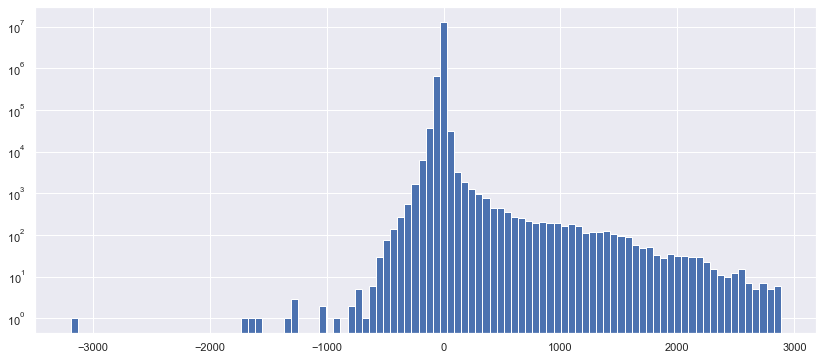

In [10]:
plt.figure(figsize=(14,6))
(instl['DAYS_ENTRY_PAYMENT']-instl['DAYS_INSTALMENT']).hist(bins=100,log=True)

In [11]:
(instl['DAYS_ENTRY_PAYMENT']-instl['DAYS_INSTALMENT']).mode()

0    0.0
dtype: float64

In [12]:
(instl['DAYS_ENTRY_PAYMENT']-instl['DAYS_INSTALMENT']).median()

-6.0

In [12]:
# instl.groupby(['DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT'])['DAYS_ENTRY_PAYMENT'].count()

In [14]:
instl[instl['DAYS_ENTRY_PAYMENT'].isna()]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN
3764212,1562727,187345,0.0,23,-5.0,NaN,11401.740,NaN
3764213,1265332,167942,1.0,5,-14.0,NaN,11650.500,NaN
3764214,1531600,103793,1.0,25,-128.0,NaN,49741.020,NaN
3764215,1852469,103171,7.0,3,-49.0,NaN,311738.355,NaN
3764216,1054684,142217,0.0,38,-1469.0,NaN,67.500,NaN


In [15]:
naDEP = instl[instl['DAYS_ENTRY_PAYMENT'].isna()][['SK_ID_CURR','NUM_INSTALMENT_NUMBER','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT']].sort_values(ascending=False,by='SK_ID_CURR')
naDEP

,SK_ID_CURR,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
13588387,455973,12,-7.0,NaN
13594261,454195,20,-2480.0,NaN
13588380,453810,2,-166.0,NaN
13605376,453693,60,-1387.0,NaN
13605380,453693,59,-1417.0,NaN
13588370,453693,61,-1356.0,NaN
13599604,453692,173,-777.0,NaN
13585681,452699,8,-61.0,NaN
13591336,452699,9,-31.0,NaN
13599654,452244,9,-152.0,NaN


In [16]:
pd.set_option('display.max_rows',None)
x = naDEP.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].count()
x

SK_ID_CURR
100224     3
100260     2
100926     4
101179     1
101216     2
101232     1
101664     1
101706     3
101949     1
102367     3
102478     1
102710     2
103054     2
103153     3
103171     1
103205     1
103793    23
103805     1
104101     1
104235     1
104490     1
104523     1
104611     1
104910     3
105061     3
105144     3
105546     1
105948     3
105957     1
106256     1
106281     1
106937     1
107222     1
107261     1
107600     3
107766     4
107882     3
108011     6
108522    10
109469     1
109475     1
109642     1
109728     4
109974     1
110450     1
111012     1
111390     3
111544     1
111870     1
111996     1
112329     3
112352     1
112813    19
112848     4
113503     2
113561     2
113575     1
113790     3
113904     1
114201     3
114337     3
114625     1
114772     1
115177     1
116163     1
116727     1
116929     2
117249     6
117257     1
117472     1
118700     2
118778     3
118854     1
119184     1
119216     4
119755     1
1

In [76]:
y = pd.DataFrame(instl.groupby('SK_ID_CURR')['NUM_INSTALMENT_NUMBER'].max())
y.head(20)

,NUM_INSTALMENT_NUMBER
SK_ID_CURR,
100001,4
100002,19
100003,12
100004,3
100005,9
100006,10
100007,17
100008,10
100009,12


In [21]:
(x/y).head(20)

SK_ID_CURR
100001   NaN
100002   NaN
100003   NaN
100004   NaN
100005   NaN
100006   NaN
100007   NaN
100008   NaN
100009   NaN
100010   NaN
100011   NaN
100012   NaN
100013   NaN
100014   NaN
100015   NaN
100016   NaN
100017   NaN
100018   NaN
100019   NaN
100020   NaN
Name: NUM_INSTALMENT_NUMBER, dtype: float64

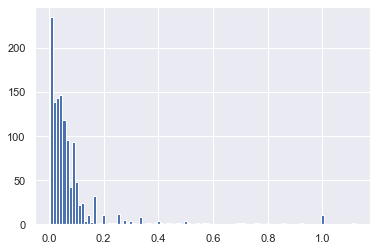

In [19]:
(x/y).hist(bins=100)

In [20]:
(x/y).value_counts()[1]

10

### 有10人無法用自己的還款記錄推估，預期讓這些人的還款紀錄的延遲狀況為0天(眾數)，且另外標註無資料